Tratamentos para serem realizados:

1.   Nos dados de treino, remover os atributos que não estão presentes nos dados de teste
1.   Remover atributos que contém valores nulos: TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, TP_STATUS_REDACAO, NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5, NU_NOTA_REDACAO, Q027
2.   Remover atributos que são textuais, futuramente esses atributos podem ser tratados para compor os dados de treino: SG_UF_RESIDENCIA, CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC
3.   Converter valores do atributo 'CO_PROVA_MT' para letras ou números
3.   Binarizar atributos: TP_SEXO, CO_PROVA_MT, 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'CO_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA'
4.   Nos dados de treino, remover linhas que tem valores nulos no atributo 'NU_NOTA_MT'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Carregar bibliotecas

In [ ]:
import pandas as pd

### Carregar dados

In [ ]:
train = pd.read_csv('dados/train.csv', sep=',', index_col=0)

train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
test = pd.read_csv('dados/test.csv', sep=',', index_col=None)

test.tail()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A
4575,adf0d15b54317b6564ef56dad2b775bbb0ef50cc,33,RJ,30,M,1,1,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,B,B,B,B,A


### Nos dados de treino, remover os atributos que não estão presentes nos dados de teste

In [ ]:
test_columns = list(test.columns)
# Adicionando coluna alvo (y)
test_columns.append('NU_NOTA_MT')
train = train[test_columns]
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


### Juntar arquivos de treino e teste para realizar os tratamentos necessários

In [ ]:
train['tipo'] = 'train'
test['tipo'] = 'test'

dados = pd.concat([train, test])
dados.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,tipo
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4,train
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8,train
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN,train
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN,train
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN,train


### Remover atributos que contém valores nulos
TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, TP_STATUS_REDACAO, NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5, NU_NOTA_REDACAO, Q027

In [ ]:
dados.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 
                    'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q027'], inplace=True)
dados.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,TP_LINGUA,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT,tipo
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,D,D,C,A,A,C,A,399.4,train
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,A,A,B,A,A,A,A,459.8,train
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,D,D,C,A,A,A,A,NaN,train
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,H,E,E,C,B,C,D,NaN,train
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,E,D,C,A,A,B,A,NaN,train


### Remover atributos que são textuais, futuramente esses atributos podem ser tratados para compor os dados de treino
SG_UF_RESIDENCIA, CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC

In [ ]:
dados.drop(columns=['SG_UF_RESIDENCIA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC'], inplace=True)
dados.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_MT,TP_LINGUA,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT,tipo
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,97caab1e1533dba217deb7ef41490f52e459ab01,1,D,D,C,A,A,C,A,399.4,train
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,97caab1e1533dba217deb7ef41490f52e459ab01,1,A,A,B,A,A,A,A,459.8,train
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,F,3,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,D,D,C,A,A,A,A,NaN,train
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,F,0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,H,E,E,C,B,C,D,NaN,train
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,M,2,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,E,D,C,A,A,B,A,NaN,train


### Converter valores do atributo 'CO_PROVA_MT' para letras ou números

In [ ]:
dados['CO_PROVA_MT'] = dados['CO_PROVA_MT'].astype('category').cat.codes
dados['CO_PROVA_MT'].unique()

array([8, 2, 7, 6, 3, 1, 0, 4, 5], dtype=int8)

In [ ]:
dados['CO_PROVA_MT'].value_counts()

2    4796
3    3597
8    3251
7    3200
6    3143
1      89
0      83
5      80
4      67
Name: CO_PROVA_MT, dtype: int64

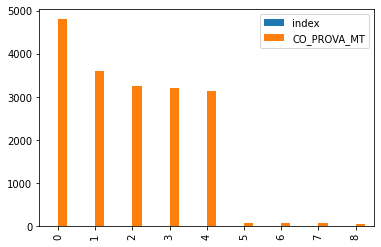

In [ ]:
dados['CO_PROVA_MT'].value_counts().reset_index().plot.bar()

### Binarizar atributos 
TP_SEXO, CO_PROVA_MT, 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'CO_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA'

In [ ]:
dados = pd.get_dummies(data=dados, columns=['TP_SEXO', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 
                                            'CO_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA'], drop_first=True)
dados.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_LINGUA,NU_NOTA_MT,tipo,TP_SEXO_M,CO_PROVA_MT_1,CO_PROVA_MT_2,CO_PROVA_MT_3,CO_PROVA_MT_4,CO_PROVA_MT_5,CO_PROVA_MT_6,CO_PROVA_MT_7,CO_PROVA_MT_8,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,...,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,4,0,0,0,0,0,0,0,0,0,1,1,1,1,399.4,train,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,0,0,0,0,0,0,0,0,0,0,1,1,1,1,459.8,train,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,train,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,9,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,4,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,train,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


### Separar os dados de treino e teste

In [ ]:
tratado_train = dados[dados.tipo == 'train']
tratado_train.drop(columns=['tipo'], inplace=True)
tratado_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_LINGUA,NU_NOTA_MT,TP_SEXO_M,CO_PROVA_MT_1,CO_PROVA_MT_2,CO_PROVA_MT_3,CO_PROVA_MT_4,CO_PROVA_MT_5,CO_PROVA_MT_6,CO_PROVA_MT_7,CO_PROVA_MT_8,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,...,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,4,0,0,0,0,0,0,0,0,0,1,1,1,1,399.4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,0,0,0,0,0,0,0,0,0,0,1,1,1,1,459.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,9,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,4,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
tratado_train.shape

(13730, 108)

In [ ]:
tratado_test = dados[dados.tipo == 'test']
tratado_test.drop(columns=['tipo'], inplace=True)
tratado_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_LINGUA,NU_NOTA_MT,TP_SEXO_M,CO_PROVA_MT_1,CO_PROVA_MT_2,CO_PROVA_MT_3,CO_PROVA_MT_4,CO_PROVA_MT_5,CO_PROVA_MT_6,CO_PROVA_MT_7,CO_PROVA_MT_8,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,...,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,0,0,0,0,0,0,0,0,0,1,1,1,0,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,0,0,0,0,0,0,0,0,0,1,1,1,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,0,0,0,0,0,0,0,0,0,1,1,1,0,NaN,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,0,0,0,0,0,0,0,0,0,1,1,1,1,NaN,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
tratado_test.shape

(4576, 108)

### Nos dados de treino, remover linhas que tem valores nulos no atributo 'NU_NOTA_MT'

In [ ]:
tratado_train['NU_NOTA_MT'].isnull().sum()

3597

In [ ]:
len(tratado_train['NU_NOTA_MT'])

13730

In [ ]:
len(tratado_train['NU_NOTA_MT']) - tratado_train['NU_NOTA_MT'].isnull().sum()

10133

In [ ]:
tratado_train.dropna(axis=0, how='any', inplace=True)
tratado_train.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(10133, 108)

Salvar os dados tratados em arquivo CSV

In [ ]:
tratado_train.to_csv('dados/train_tratado.csv', sep=';', index=False)

tratado_test.to_csv('dados/test_tratado.csv', sep=';', index=False)

****
# Próxima etapa: "Modeling"